In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
res_2_df = pd.read_csv('results_1.2.csv')

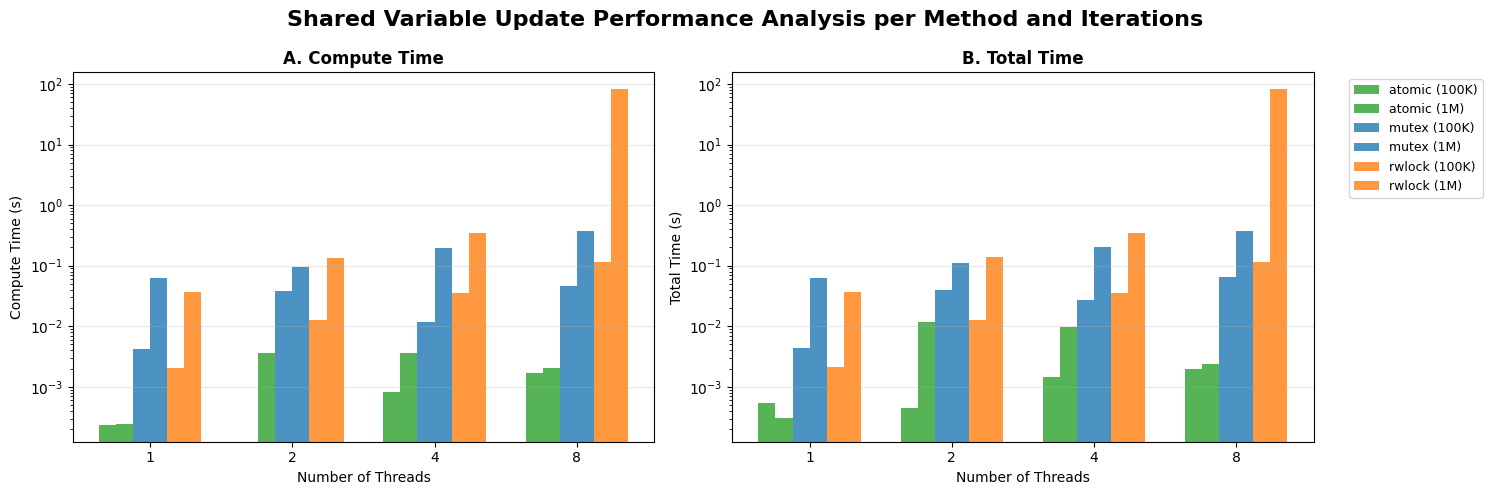

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 1.2 Shared Variable Update Analysis - Part 1 (A and B)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Shared Variable Update Performance Analysis per Method and Iterations', fontsize=16, fontweight='bold')

# Colors per method, markers per iteration
colors = {'mutex': '#1f77b4', 'rwlock': '#ff7f0e', 'atomic': '#2ca02c'}

# Helper function for iteration labels
def get_iter_label(iterations):
    if iterations >= 1000000:
        return f'{iterations//1000000}M'
    elif iterations >= 1000:
        return f'{iterations//1000}K'
    return str(iterations)

# Filter data
parallel_data = res_2_df[res_2_df['method'] != 'sequential'].copy()
parallel_data['threads_num'] = parallel_data['threads'].astype(int)

# Plot 1: Compute Time - Bar Plot
methods = sorted(parallel_data['method'].unique())
iterations_list = sorted(parallel_data['iterations'].unique())
threads_list = sorted(parallel_data['threads_num'].unique())

# Prepare data for Plot A (Compute Time)
x = np.arange(len(threads_list))
width = 0.12
bar_offset = 0

for method in methods:
    for iter_val in iterations_list:
        data = parallel_data[(parallel_data['method'] == method) & 
                            (parallel_data['iterations'] == iter_val)].sort_values('threads_num')
        label = f'{method} ({get_iter_label(iter_val)})'
        offset = (bar_offset - len(methods) * len(iterations_list) / 2 + 0.5) * width
        axes[0].bar(x + offset, data['time_compute'].values, width, label=label, alpha=0.8, color=colors[method])
        bar_offset += 1

axes[0].set_xlabel('Number of Threads')
axes[0].set_ylabel('Compute Time (s)')
axes[0].set_title('A. Compute Time', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(threads_list)
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_yscale('log')

# Plot 2: Total Time - Bar Plot
x = np.arange(len(threads_list))
bar_offset = 0

for method in methods:
    for iter_val in iterations_list:
        data = parallel_data[(parallel_data['method'] == method) & 
                            (parallel_data['iterations'] == iter_val)].sort_values('threads_num')
        label = f'{method} ({get_iter_label(iter_val)})'
        offset = (bar_offset - len(methods) * len(iterations_list) / 2 + 0.5) * width
        axes[1].bar(x + offset, data['time_total'].values, width, label=label, alpha=0.8, color=colors[method])
        bar_offset += 1

axes[1].set_xlabel('Number of Threads')
axes[1].set_ylabel('Total Time (s)')
axes[1].set_title('B. Total Time', fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(threads_list)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_yscale('log')

# Synchronize y-axis scales
y_min_a = axes[0].get_ylim()[0]
y_max_a = axes[0].get_ylim()[1]
y_min_b = axes[1].get_ylim()[0]
y_max_b = axes[1].get_ylim()[1]
y_min = min(y_min_a, y_min_b)
y_max = max(y_max_a, y_max_b)
axes[0].set_ylim([y_min, y_max])
axes[1].set_ylim([y_min, y_max])

plt.tight_layout()
plt.show()


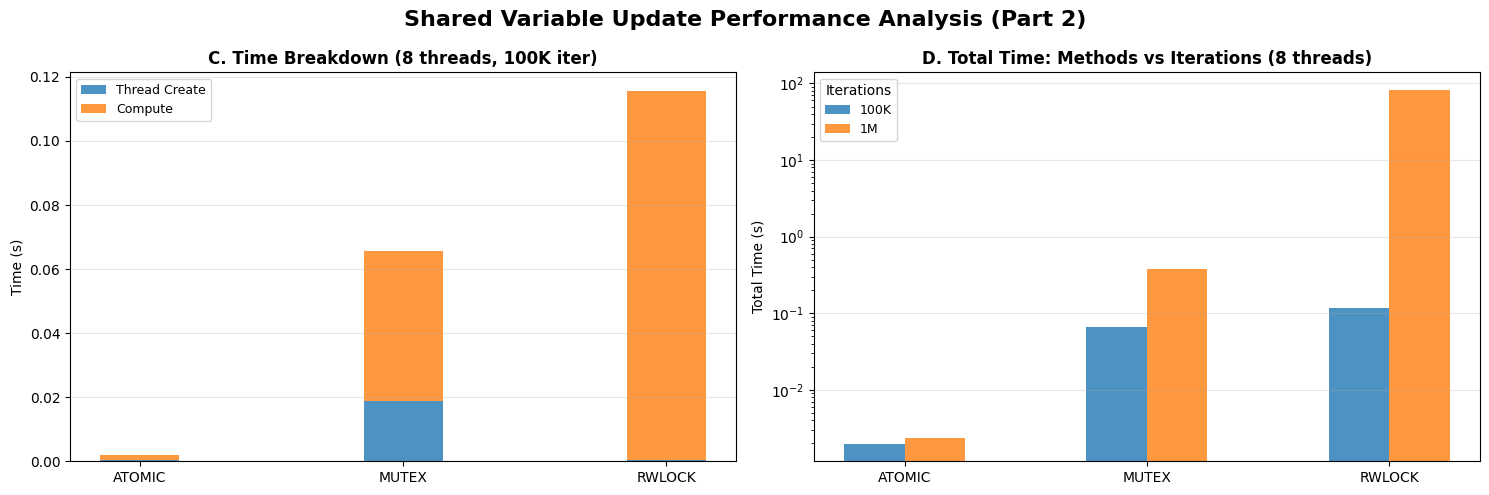

In [5]:
# 1.2 Shared Variable Update Analysis - Part 2 (C and D)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Shared Variable Update Performance Analysis (Part 2)', fontsize=16, fontweight='bold')

# Filter data
parallel_data = res_2_df[res_2_df['method'] != 'sequential'].copy()
parallel_data['threads_num'] = parallel_data['threads'].astype(int)

# Plot 3: Time Breakdown (8 threads, 100K iter)
eight_thread_100k = parallel_data[(parallel_data['threads_num'] == 8) & 
                                 (parallel_data['iterations'] == 100000)]

methods = sorted(eight_thread_100k['method'].unique())
components = ['time_thread_create', 'time_compute']
labels_breakdown = ['Thread Create', 'Compute']

x_pos = np.arange(len(methods))
bottom = np.zeros(len(methods))
bar_width = 0.3

for idx, component in enumerate(components):
    values = [eight_thread_100k[eight_thread_100k['method'] == m][component].values[0] for m in methods]
    axes[0].bar(x_pos, values, bottom=bottom, width=bar_width, label=labels_breakdown[idx], alpha=0.8)
    bottom += values

axes[0].set_ylabel('Time (s)')
axes[0].set_title('C. Time Breakdown (8 threads, 100K iter)', fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels([m.upper() for m in methods])
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3, axis='y')

# Plot 4: Methods vs Iterations (8 threads)
eight_thread_all = parallel_data[parallel_data['threads_num'] == 8]
pivot_data = eight_thread_all.pivot_table(values='time_total', index='method', columns='iterations')

x_methods = np.arange(len(pivot_data.index))
width = 0.25
iterations_list = sorted(pivot_data.columns)

for idx, col in enumerate(iterations_list):
    offset = (idx - len(iterations_list)/2 + 0.5) * width
    axes[1].bar(x_methods + offset, pivot_data[col], width, 
                  label=get_iter_label(col), alpha=0.8)

axes[1].set_ylabel('Total Time (s)')
axes[1].set_title('D. Total Time: Methods vs Iterations (8 threads)', fontweight='bold')
axes[1].set_xticks(x_methods)
axes[1].set_xticklabels([m.upper() for m in pivot_data.index])
axes[1].legend(title='Iterations', fontsize=9)
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
